<a href="https://colab.research.google.com/github/josejailson/cartpole/blob/main/gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U gym
%pip install -U gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pygame-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalling pygame-2.3.0:
      Successfully uninstalled pygame-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
%pip install gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ale_py-0.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)


In [ ]:
import gym
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [ ]:
obs, info = env.reset()
obs

array([-0.02956768,  0.0206355 ,  0.0432662 ,  0.01663813], dtype=float32)

In [ ]:
img = env.render()

In [ ]:
img.shape

(400, 600, 3)

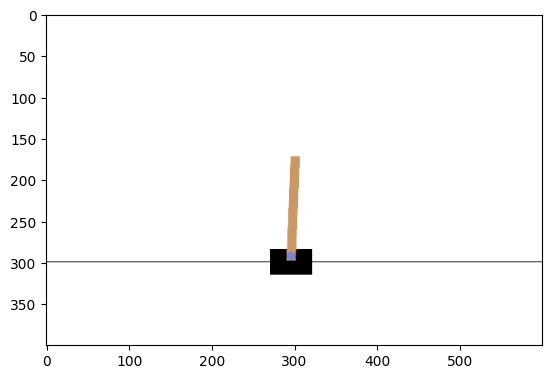

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
env.action_space


Discrete(2)

In [ ]:
#env.reset()
for n in range(10):
  obs, reward, done, truncated, info = env.step(1)

/usr/local/lib/python3.10/dist-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


In [ ]:
imga = env.render()


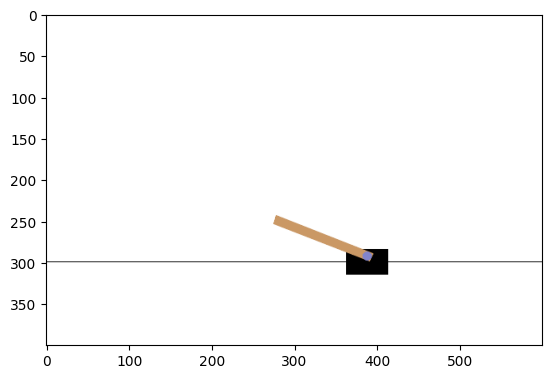

In [ ]:
plt.imshow(imga)

In [ ]:
env.close()

In [ ]:
def basic_policy(obs):
  angle = obs[2]
  return 0 if angle<0 else 1

totals = []
for episode in range(500):
  episode_rewards = 0
  obs, info = env.reset(seed=episode)
  for step in range(200):
    action = basic_policy(obs)
    obs, reward, done, truncated, info = env.step(action)
    episode_rewards += reward
    if done or truncated:
      break
totals.append(episode_rewards)

In [ ]:
import numpy as np

mi(totals)

48.0

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
def play_one_step(env, obs, model, loss_fn):
  with tf.GradientTape() as tape:
    left_proba = model(obs[np.newaxis])
    action = (tf.random.uniform([0,1])>left_proba)
    y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
    loss = tf.reduce_mean(loss_fn(y_target, left_proba))

grads = tape.gradient(loss, model.treinable_variables)
obs, reward, done, truncated, info = env.step(int(action))
return obs, reward, done, truncated, grads

In [ ]:
"Building a neural network policy for the CartPole control problem"



import tensorflow as tf


# neural network policy
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#
def play_one_step(env, obs, model, loss_fn):
  with tf.GradientTape() as tape:
    left_proba = model(obs[np.newaxis])
    action = (tf.random.uniform([0,1])>left_proba)
    y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
    loss = tf.reduce_mean(loss_fn(y_target, left_proba))

grads = tape.gradient(loss, model.trainable_variables)
obs, reward, done, truncated, info = env.step(int(action))
return obs, reward, done, truncated, grads

